In [1]:
# Importamos nuestra librerías básicas
import numpy as np
import os
import itertools


from sklearn.datasets import fetch_mldata
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# Este paso es para que los resultados en vuestros notebooks sean iguales a lo de este
np.random.seed(42)


# Aprendizaje supervisado - SVM

En este notebook volveremos a clasificar el MNIST, pero ahora utilizando el clasificador basado en Support Vector Machine o SVM

In [2]:
# Aqui importamos los datos que vamos a clasificar
mnist = fetch_mldata('MNIST original')

# El dataset contiene 70.000 ejemplos de digitos escritos a mano
# en blanco y negro. Cada digito esta representada por una imagen de 28x28 pixels.
# Además el dataset incluye el "target" i.e. el numero asociado con cada imagen.

# Otros datasets serían más rápidos de ejecutar, pero la ventaja de este es que,
# debido a su complejidad, cuando empecemos a utilizar modelos más complejos (como 
# redes neuronales), se empezarán a ver las ventajas de estos modelos más complejos

# Aqui cargamos nuestros ejemplos en X, el target en y. Nuestro objetivo con
# Machine Learning es aprender la función f(X) que genera y.
X, y = mnist["data"], mnist["target"]

In [3]:
# Nuestro objetivo es que la función aprendida funcione no solamente con
# el dataset de prueba, pero que también "generalize" bien para ejemplos
# que no haya visto antes.

# En esta sección separamos el dataset en 2 partes: el training set y test set
# utilizamos la función train_test_split para que los set sean "estratificados"
X_train_o, X_test_o, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

### Normalización de los datos

In [4]:
# Antes de enviar los datos al modelo, hacemos una adaptación de los datos para normalizarlos
# Por normalización en este contexto la idea es remover la media de cada "feature"
# (i.e. centrar en zero) y dividir por la "variance", es decir hacer que los datos estén entre
# 0 y 1.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_o)
X_test = scaler.transform(X_test_o)


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Clasificador utilizando Support Vector Machines

In [5]:
# El modelo SVC ...

# Creamos el modelo
svc_clf = SVC(kernel='rbf', probability=True, random_state=42)
# Hacemos fit del modelo al dato
%time svc_clf.fit(X_train, y_train)


Wall time: 1h 22min 47s
Wall time: 20min 15s
Rendimiento en el dataset de training: 0.9849
Wall time: 3min 35s
Rendimiento en el dataset de pruebas: 0.9671


In [6]:
# Medimos el rendimiento.
%time train_score = svc_clf.score(X_train, y_train)
print("Rendimiento en el dataset de training: %.4f" % train_score)
%time score = svc_clf.score(X_test, y_test)
print("Rendimiento en el dataset de pruebas: %.4f" % score)

Wall time: 19min 57s
Rendimiento en el dataset de training: 0.9849
Wall time: 3min 30s
Rendimiento en el dataset de pruebas: 0.9671


In [7]:
# Esta función esta adaptada de la documentación del Scikit-Learn para presentar
# la matrix de "confusión" de forma más visual
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')
        

    #print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("Valor real")
    plt.xlabel("Predicción")
    plt.show()


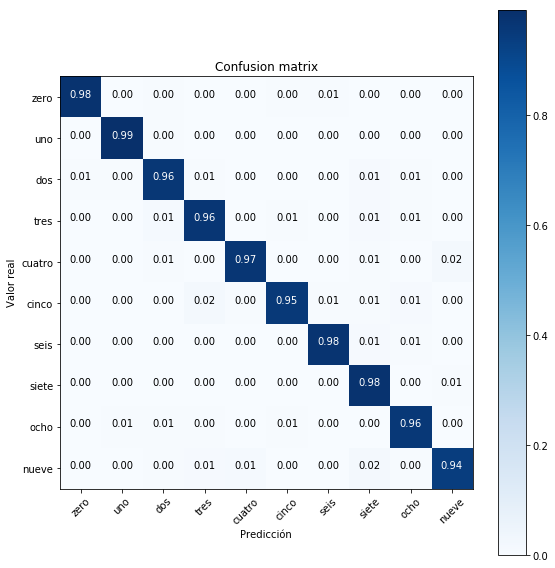

In [8]:
# La confusion matrix nos presenta una información sumaria de la precisión y del recall
cm=confusion_matrix(y_test, svc_clf.predict(X_test))
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, classes=["zero","uno","dos","tres","cuatro","cinco","seis","siete","ocho","nueve"], normalize=True);

In [9]:
# El modelo SVC ...

# Creamos el modelo
svc_clf = SVC(kernel='linear', probability=True, random_state=42)
# Hacemos fit del modelo al dato
%time svc_clf.fit(X_train, y_train)

Wall time: 50min 43s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
# Medimos el rendimiento.
%time train_score = svc_clf.score(X_train, y_train)
print("Rendimiento en el dataset de training: %.4f" % train_score)
%time score = svc_clf.score(X_test, y_test)
print("Rendimiento en el dataset de pruebas: %.4f" % score)

Wall time: 11min 52s
Rendimiento en el dataset de training: 0.9828
Wall time: 2min 5s
Rendimiento en el dataset de pruebas: 0.9261


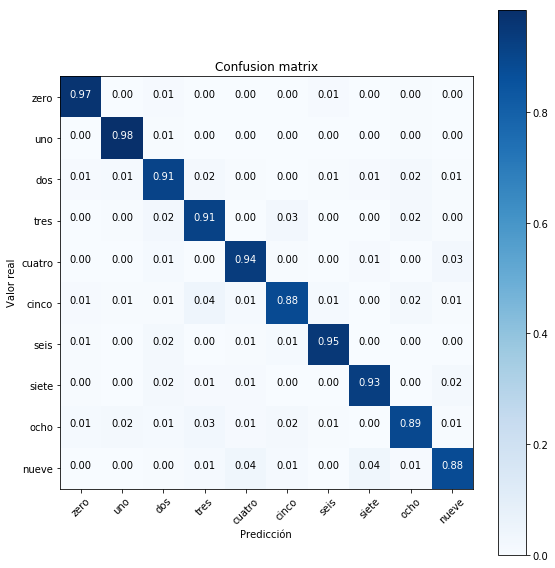

In [11]:
# La confusion matrix nos presenta una información sumaria de la precisión y del recall
cm=confusion_matrix(y_test, svc_clf.predict(X_test))
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, classes=["zero","uno","dos","tres","cuatro","cinco","seis","siete","ocho","nueve"], normalize=True);